In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
# import statsmodels.api as sm

In [2]:
data = pd.read_stata('data/DataTimeSeries.dta')

# Case 1: Blackbox

Use an auto regressive model based on previous demand.

In [4]:
games_blackbox = data[(data['treat']== 'blackbox')]

X = games_blackbox.loc[:, ['lagd', 's']]
y = games_blackbox['d']

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

res = []
for l2 in [1e-4, 1e-3, 1e-2, 1e-2, 1, 10, 1e2]:
    model = Ridge(alpha=l2)

    scores = cross_validate(model, X, y, cv=10,
                            scoring=('neg_mean_squared_error'),
                            return_train_score=False)
    
    res.append((l2, -np.mean(scores['test_score'])))

for r in res:
    print(r)

(0.0001, 567.0403594970703)
(0.001, 567.0403747558594)
(0.01, 567.0403594970703)
(0.01, 567.0403594970703)
(1, 567.040151977539)
(10, 567.0385192871094)
(100.0, 567.036328125)


In [6]:
model = Ridge(alpha=1e-1)
model.fit(X, y)
model.coef_

array([ 0.75497335, 13.1468725 ], dtype=float32)

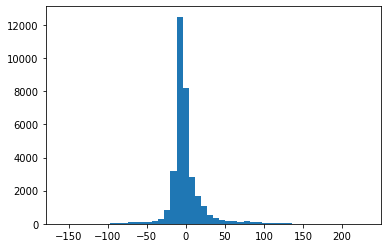

In [12]:
y_pred = model.predict(X)
residual = y-y_pred
plt.hist(residual, bins=50);

(-1.6918268210782678e-06, 13.213523416056931)
KstestResult(statistic=0.19168421947928865, pvalue=0.0)


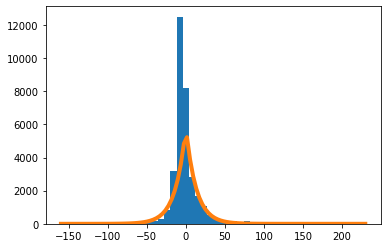

In [19]:
import scipy.stats as st

args = st.laplace.fit(residual)

print(args)
print(st.kstest(residual, st.laplace.cdf, args))

h = plt.hist(residual, bins=50);
xx = np.linspace(residual.min(), residual.max(), 100)
yy = st.laplace.pdf(xx, *args)
nbins = len(h[0])
omax = residual.max()
plt.plot(xx,yy * len(residual) * omax / nbins, lw=4);

# Case 2: Same side

In [180]:
games_blackbox = data[(data['treat'] == 'own')]

X = games_blackbox.loc[:, ['lagd', 's', 'own']]
y = games_blackbox['d']

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

y = y[~np.isnan(X[:, 2])]
X = X[~np.isnan(X[:, 2])]

In [192]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

res = []
for l2 in [1e-4, 1e-3, 1e-2, 1e-2, 1, 10, 1e2]:
    model = Ridge(alpha=l2)

    scores = cross_validate(model, X, y, cv=50,
                            scoring=('neg_mean_squared_error'),
                            return_train_score=False)
    
    res.append((l2, -np.mean(scores['test_score'])))

for r in res:
    print(r)

(0.0001, 293.4764101409912)
(0.001, 293.47641067504884)
(0.01, 293.4764113616943)
(0.01, 293.4764113616943)
(1, 293.4781552124023)
(10, 293.5705583953857)
(100.0, 297.4006681060791)


In [182]:
model = Ridge(alpha=10)
model.fit(X, y)
model.coef_

array([ 0.6807296, 10.604975 ,  0.0132582], dtype=float32)

# Other side information

In [183]:
games_blackbox = data[(data['treat'] == 'other')]

X = games_blackbox.loc[:, ['lagd', 's', 'other']]
y = games_blackbox['d']

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

y = y[~np.isnan(X[:, 2])]
X = X[~np.isnan(X[:, 2])]

In [184]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

res = []
for l2 in [1e-4, 1e-3, 1e-2, 1e-2, 1, 10, 1e2]:
    model = Ridge(alpha=l2)

    scores = cross_validate(model, X, y, cv=30,
                            scoring=('neg_mean_squared_error'),
                            return_train_score=False)
    
    res.append((l2, -np.mean(scores['test_score'])))

for r in res:
    print(r)

(0.0001, 268.0079938491186)
(0.001, 268.00800975163776)
(0.01, 268.00805755456287)
(0.01, 268.00805755456287)
(1, 268.0170711437861)
(10, 268.3597914854685)
(100.0, 274.77072677612307)


# Full information

In [185]:
games_blackbox = data[(data['treat'] == 'full')]

X = games_blackbox.loc[:, ['lagd', 's', 'own', 'other', 'dealprice']]
y = games_blackbox['d']

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

y = y[~np.isnan(X[:, 2])]
X = X[~np.isnan(X[:, 2])]

y = y[~np.isnan(X[:, 3])]
X = X[~np.isnan(X[:, 3])]

y = y[~np.isnan(X[:, 4])]
X = X[~np.isnan(X[:, 4])]

In [186]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

res = []
for l2 in [1e-4, 1e-3, 1e-2, 1e-2, 1, 10, 1e2]:
    model = Ridge(alpha=l2)

    scores = cross_validate(model, X, y, cv=30,
                            scoring=('neg_mean_squared_error'),
                            return_train_score=False)
    
    res.append((l2, -np.mean(scores['test_score'])))

for r in res:
    print(r)

(0.0001, 292.50174814860026)
(0.001, 292.5017557779948)
(0.01, 292.5017936706543)
(0.01, 292.5017936706543)
(1, 292.50742263793944)
(10, 292.6346725463867)
(100.0, 296.7091636657715)


In [187]:
model = Ridge(alpha=1e-2)
model.fit(X, y)
model.coef_

array([ 3.4200886e-01,  1.6926205e+01, -1.2738276e-02,  5.3933808e-03,
        7.0086890e-01], dtype=float32)